# Recursion in Morpheus

# Preliminaries

## Imports

In [1]:
import os
import sys
import numpy as np
import pprint


from os.path import dirname
from networkx.drawing.nx_pydot import to_pydot

# Import morpheus
note_dir = dirname(os.getcwd())
root_dir = dirname(note_dir)
src_dir = os.path.join(root_dir, "src")

sys.path.append(src_dir)

import morpheus
from morpheus import Morpheus
from morpheus.tests import (default_dataset,
                            default_m_list_for_mercs,
                            random_m_list_for_mercs)

from morpheus.algo.inference import get_predict

# Visuals
from morpheus.graph import to_dot
from morpheus.visuals import show_diagram
from morpheus.graph.network import *

from morpheus.composition import o as ω
from morpheus.composition import x as χ

# Ipython things
from IPython.display import Image, display
from IPython.core.display import HTML 

pp = pprint.PrettyPrinter(indent=4)

## Methods

## General Variables

# Prepare sandbox

Train a morpheus on a dataset and extract an interesting composite model.

In [2]:
m = Morpheus(random_state=802,
             prediction_algorithm='it',
             clf_criterion='entropy',
             rgr_criterion='mae',
             selection_algorithm='random',
             nb_targets=1,
             nb_iterations=10,
             fraction_missing=0.4,
             max_depth=15,
             regression_max_depth=25)

df_train, df_test = default_dataset()
test = df_test.copy().values

q_code = np.array([0,0,-1,-1,-1,-1,0,1])

m.fit(df_train.values)

In [14]:
Y = m.predict(test, q_code=q_code)


    sorted_list:    ['d-01', 'd-06', 'f-99', 'd-07']
    

[1, 6]
Retain indices: [1 2]


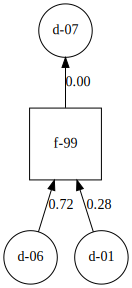

In [15]:
m.show_q_diagram(fi=True)

In [4]:
q_compose = m.q_compose
q_compose.desc_ids, q_compose.targ_ids

([1, 6], [7])

In [5]:
cg = model_to_graph(q_compose, idx=99)
m.g_list.append(cg)
m.m_list.append(q_compose)

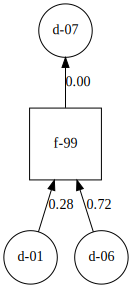

In [6]:
show_diagram(m.g_list[-1], fi=True)

In [7]:
Y2 = m.predict(df_test.values, q_code=q_code)


    sorted_list:    ['d-01', 'd-06', 'f-99', 'd-07']
    

[1, 6]
Retain indices: [1 2]


In [8]:
np.sum(Y-Y2)

0.0

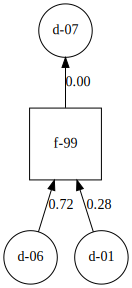

In [9]:
m.show_q_diagram(fi=True)